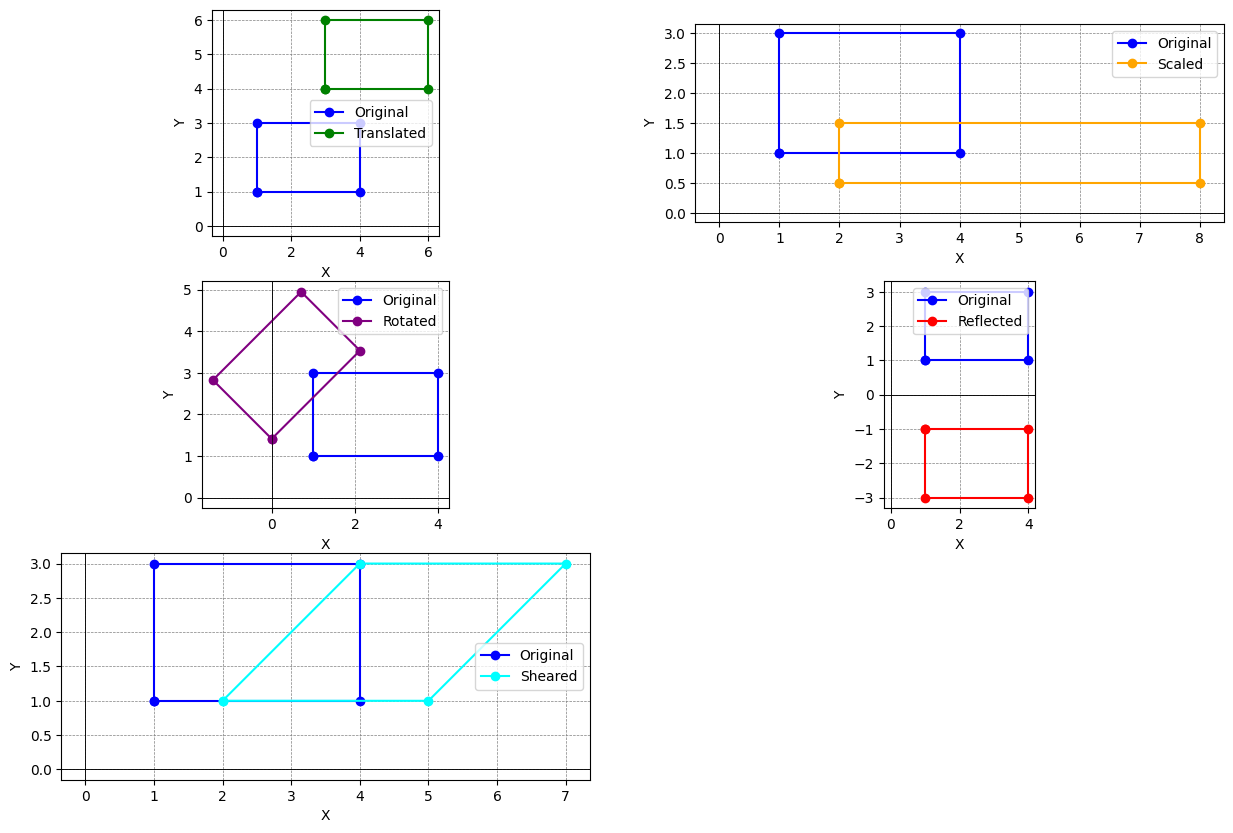

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_shape(points, title, color='blue', label=None):
    points = np.append(points, points[:1], axis=0)
    plt.plot(points[:, 0], points[:, 1], marker='o', color=color, label=label)
    if label:
        plt.legend()
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.gca().set_aspect('equal', adjustable='box')

def translate(points, tx, ty):

    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    points_homogeneous = np.hstack((points, np.ones((points.shape[0], 1))))
    translated_points = points_homogeneous @ translation_matrix.T
    return translated_points[:, :2]

def scale(points, sx, sy):

    scaling_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    points_homogeneous = np.hstack((points, np.ones((points.shape[0], 1))))
    scaled_points = points_homogeneous @ scaling_matrix.T
    return scaled_points[:, :2]

def rotate(points, angle):

    rad = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad), np.cos(rad), 0],
        [0, 0, 1]
    ])
    points_homogeneous = np.hstack((points, np.ones((points.shape[0], 1))))
    rotated_points = points_homogeneous @ rotation_matrix.T
    return rotated_points[:, :2]

def reflect(points, axis):

    if axis == 'x':
        reflection_matrix = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    elif axis == 'origin':
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    else:
        raise ValueError("Invalid axis. Choose 'x', 'y', or 'origin'.")

    points_homogeneous = np.hstack((points, np.ones((points.shape[0], 1))))
    reflected_points = points_homogeneous @ reflection_matrix.T
    return reflected_points[:, :2]

def shear(points, shx, shy):

    shearing_matrix = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])
    points_homogeneous = np.hstack((points, np.ones((points.shape[0], 1))))
    sheared_points = points_homogeneous @ shearing_matrix.T
    return sheared_points[:, :2]


# Define a rectangle as an example
rectangle = np.array([
    [1, 1],
    [4, 1],
    [4, 3],
    [1, 3]
])

plt.figure(figsize=(15, 10))

# Translation
translated = translate(rectangle, 2, 3)
plt.subplot(3, 2, 1)
plot_shape(rectangle, "Translation", 'blue', label="Original")
plot_shape(translated, "", 'green', label="Translated")

# Scaling
scaled = scale(rectangle, 2, 0.5)
plt.subplot(3, 2, 2)
plot_shape(rectangle, "Scaling", 'blue', label="Original")
plot_shape(scaled, "", 'orange', label="Scaled")

# Rotation
rotated = rotate(rectangle, 45)
plt.subplot(3, 2, 3)
plot_shape(rectangle, "Rotation", 'blue', label="Original")
plot_shape(rotated, "", 'purple', label="Rotated")

# Reflection
reflected = reflect(rectangle, 'x')
plt.subplot(3, 2, 4)
plot_shape(rectangle, "Reflection", 'blue', label="Original")
plot_shape(reflected, "", 'red', label="Reflected")

# Shearing
sheared = shear(rectangle, 1, 0)
plt.subplot(3, 2, 5)
plot_shape(rectangle, "Shearing", 'blue', label="Original")
plot_shape(sheared, "", 'cyan', label="Sheared")

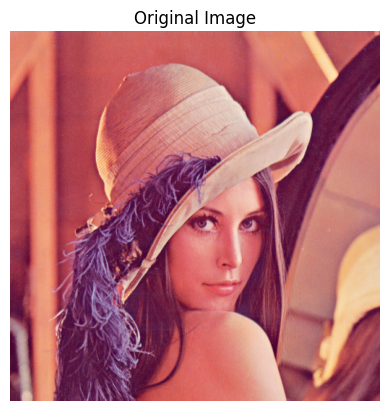

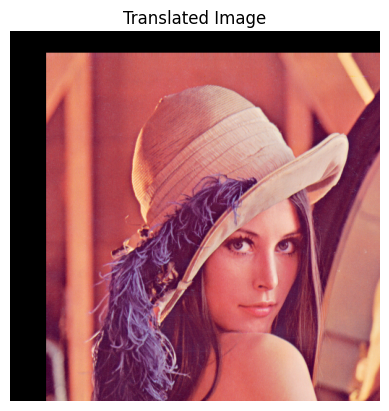

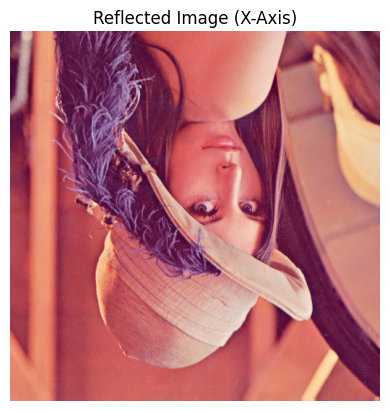

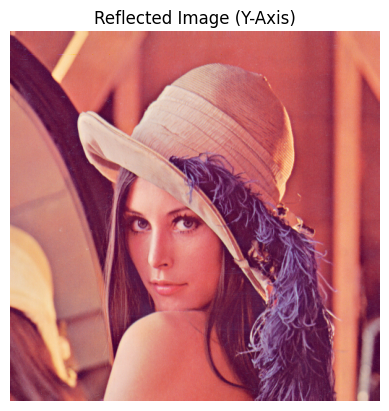

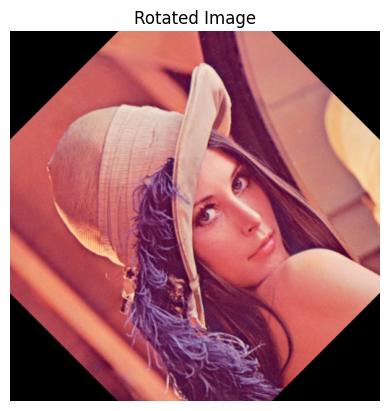

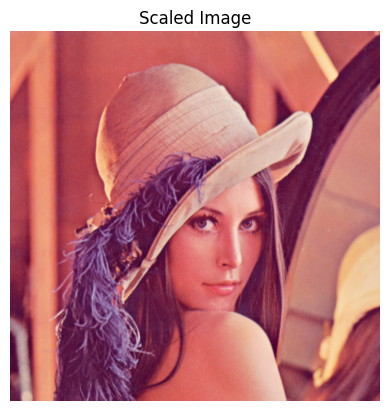

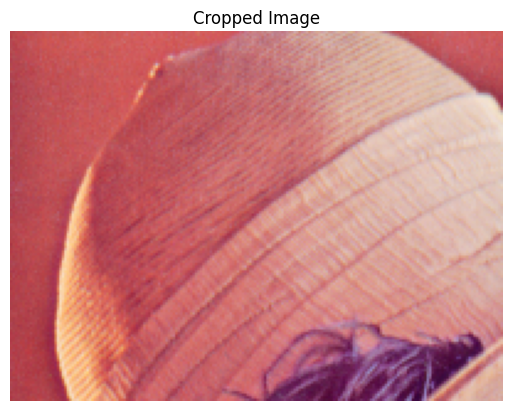

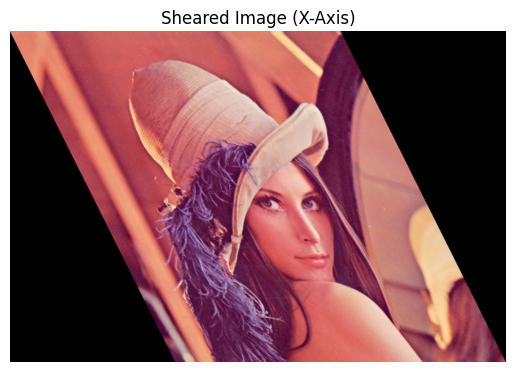

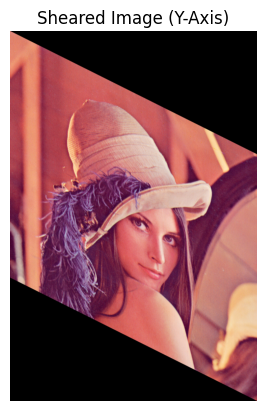

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

image = cv2.imread("lena.png")
display_image(image, "Original Image")

(h, w) = image.shape[:2]

# 1. Image Translation
tx, ty = 50, 30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(image, translation_matrix, (w, h))
display_image(translated_image, "Translated Image")

# 2. Image Reflection
reflected_image_x = cv2.flip(image, 0)
display_image(reflected_image_x, "Reflected Image (X-Axis)")

reflected_image_y = cv2.flip(image, 1)
display_image(reflected_image_y, "Reflected Image (Y-Axis)")

# 3. Image Rotation
angle = 45
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
display_image(rotated_image, "Rotated Image")

# 4. Image Scaling
scaling_factor_x, scaling_factor_y = 1.5, 1.5
scaled_image = cv2.resize(image, None, fx=scaling_factor_x, fy=scaling_factor_y, interpolation=cv2.INTER_LINEAR)
display_image(scaled_image, "Scaled Image")

# 5. Image Cropping
cropped_image = image[50:200, 100:300]
display_image(cropped_image, "Cropped Image")

# 6. Shearing in x-axis
shear_x = 0.5
shearing_matrix_x = np.float32([[1, shear_x, 0], [0, 1, 0]])
sheared_image_x = cv2.warpAffine(image, shearing_matrix_x, (int(w + h * shear_x), h))
display_image(sheared_image_x, "Sheared Image (X-Axis)")

# 7. Shearing in y-axis
shear_y = 0.5
shearing_matrix_y = np.float32([[1, 0, 0], [shear_y, 1, 0]])
sheared_image_y = cv2.warpAffine(image, shearing_matrix_y, (w, int(h + w * shear_y)))
display_image(sheared_image_y, "Sheared Image (Y-Axis)")